# Step7 演習02 教師なし学習 k平均法とPCA
---

Step7では、有名な教師なし学習としてk平均法と主成分分析(PCA)を実装します。

**はじめに**
- for文やwhile文の利用は明示的な利用指示がない場所での使用は避けてください。

**本演習の目的**
- 教師なし学習のk平均法を実装する。
- 教師なし学習のk主成分分析を実装する。

## 主成分分析(PCA)

主成分分析はデータの広く分布している方向（新たな特徴となる）を選んでいくことで、局所的にしか分布していない方向をおとして、データの次元（特徴の数）を落とす手法でした。

まず、PCAをscikit-learnを使わず、主にnumpyを使って実装してみましょう。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)
import numpy as np
from sklearn import datasets #サンプルデータの生成にのみscikit-learnを使います
import os

### PCAに使うサンプルデータを生成
実装したPCAのコードを試すためのサンプルデータを最初に生成しておきます。一度生成したら同じものを毎回使えるように、データをCSVファイルで保存しておきます。新たなデータを使いたいときは、CSVファイルの名前を変えるか、コードを変えましょう。

In [2]:
if not os.path.isdir("./dataStep7"):
    os.makedirs("./dataStep7")
    
if os.path.isfile("./dataStep7/dataStep7_2.csv") == True:
    X = np.loadtxt("./dataStep7/dataStep7_2.csv", delimiter = ",")

else:
    X1, X2 = datasets.make_regression(n_samples=50, n_features=1, n_informative=1, noise=40)
    X2 = X2/40
    X = np.c_[X1,X2]
    np.savetxt("./dataStep7/dataStep7_2.csv", X, delimiter=",")

### 生成したデータの表示
視覚化は大切です。逐一視覚化していきましょう。

In [3]:
def plotX(X):
    plt.scatter(X[:,0], X[:,1], marker="o")
    plt.axis([0.5, 6.5, 2, 8])
    plt.axis("equal")
    plt.draw()

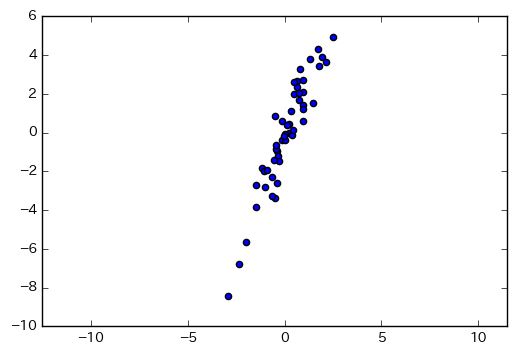

In [4]:
plotX(X)

### Feature Scaling
PCAを行う前に、各特徴のレンジを揃えるFeature Scalingを行いましょう。

**【課題９】** Feature Scalingを行う関数`featureScaling(X)`を実装しましょう。返値は、Feature Scaling後のデータである`X_norm`と、元の各特徴の平均`mu`、標準偏差`std`（元の値に戻すときに利用）とします。

In [5]:
#Coursemale-02 Step7 QuestionNumber9 21abd8e21d8b8f7f9c8cc064fe18eb4b
def featureScaling(X):
###############ここを穴埋めしてください###############
    mu = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = ( X - mu ) / std
######################################################
    return [X_norm, mu, std]

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [6]:
%%bash
./validation_client.py male-02 7 9 Step7_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



そして、Feature Scalingを実行します

In [7]:
X_norm, mu, std = featureScaling(X)

### PCAの実装
PCAを実装しましょう。

**【課題１０】** 共分散行列$$\Sigma=\frac{1}{m}\sum^n_{i=1}\left(\boldsymbol{x}^{(i)}\right)\left(\boldsymbol{x}^{(i)}\right)^{\top}$$
ただし$\boldsymbol{x}^{(i)}$はFeature Scalingを行ったもの

を求め、特異値分解(Singular Value Decomposition)を行う関数`runPCA(X)`を書きましょう。返値は$\Sigma=USV$の$U$と$S$だけでよいです。

参考：
[Numpyチュートリアル numpy.linalg.svd](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)

In [8]:
#Coursemale-02 Step7 QuestionNumber10 3d2afb6873d848e6d32ca0bf5d74b8d4
def runPCA(X):
###############ここを穴埋めしてください###############
    m, n = X.shape
    Sigma = X.T.dot(X) / m #共分散行列
    U, S, V = np.linalg.svd(Sigma)
    return [U, S]
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [9]:
%%bash
./validation_client.py male-02 7 10 Step7_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



共分散行列$\Sigma$は半正定値行列ですから、実は固有値分解$\Sigma=VWV^{-1}$の結果と等価です。（実装によって符号が反転する場合はある）

そして、PCAを実行します

In [10]:
U, S = runPCA(X_norm)

### 結果をプロット
得たものをプロットしましょう。データの平均付近から順番に各固有ベクトルを掃引します。長さは固有値に比例するようプロットすることにしたいのですが、２成分目の線はあまりに短すぎて見えないことがあるので、**１成分目の20倍の長さをとっています**。

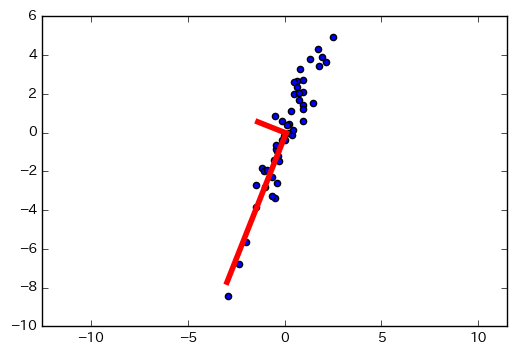

In [11]:
tmp0 = mu + (2 * S[0] * U[:,0].T)*std
tmp1 = mu + (40 * S[1] * U[:,1].T)/std

plotX(X)
plt.plot([mu[0], tmp0[0]], [mu[1], tmp0[1]], linewidth=4, c="r")
plt.plot([mu[0], tmp1[0]], [mu[1], tmp1[1]], linewidth=4, c="r")
plt.show()

### 射影していく様子をプロット
固有値が大きかった固有ベクトル（主成分）に対して、射影していく様子をプロットしましょう。これによって、特徴の数を2つから1つに落とせるわけです。もとの特徴に復元するときは、他の成分を落としている限り完全には復元されず、次に挙げる例のちょうど射影した場所に復元されます。

まず射影します。

In [12]:
def projectData(X, U, K):
    return np.array([[ X[i,:].dot(U[:,k]) for k in range(K)] for i in range(X.shape[0])])

In [13]:
K = 1 #1次元に落としたい
Z = projectData(X_norm, U, K)

そして復元します。

In [14]:
def recoverData(Z, U, K):
    return np.array([[Z[i,:].dot(U[j,:K]) for j in range(U.shape[0])] for i in range(Z.shape[0])])

In [15]:
X_rec = recoverData(Z, U, K)

元に戻した時の場所をプロットします。

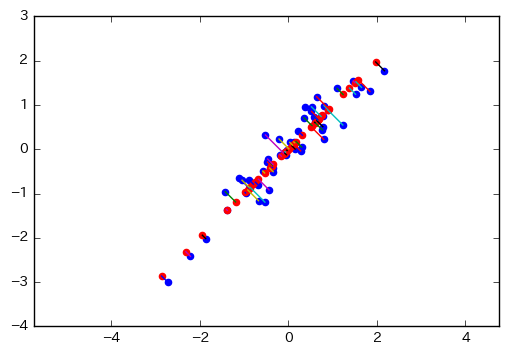

In [16]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker='o', color="b") #簡便のため、すでにFeature Scalingされたデータで見ることにします。
plt.axis([-4, 3, -4, 3])
plt.axis('equal')
plt.hold(True)
plt.scatter(X_rec[:,0], X_rec[:,1], marker="o", color="r")
for i in range(len(X_norm)):
    plt.plot([X_norm[i,0], X_rec[i,0]], [X_norm[i,1], X_rec[i,1]])
plt.show()

---
### Scikit-learnでPCA
では、今度はScikit-learnでPCAを実装しましょう。

参考：
[Scikit-learn チュートリアル sklearn.decomposition.PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [17]:
import sklearn.decomposition as skd

おなじみのscikit-learnの使い方で実装していきましょう。

In [18]:
estimator = skd.PCA()
estimator.fit(X)
U = estimator.components_.T
S = estimator.explained_variance_ratio_
mu = estimator.mean_

プロットします。ここでもやはり、２成分目の線はサンプルデータによってあまりに短すぎて見えないことがあるので、**１成分目の20倍の長さをとっています**。実装やバージョンによって主成分の向きが180度回転している場合がありますが、問題ありません。

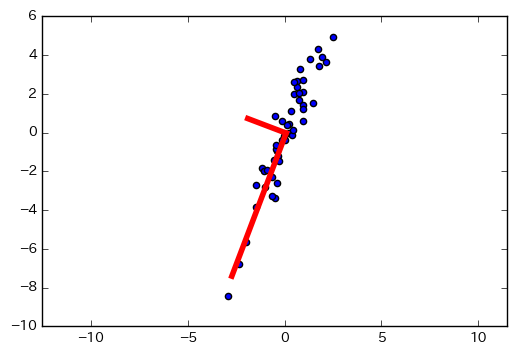

In [19]:
tmp0 = mu + (8 * S[0] * U[:,0].T)
tmp1 = mu + (160 * S[1] * U[:,1].T)

plotX(X)
plt.plot([mu[0], tmp0[0]], [mu[1], tmp0[1]], linewidth=4, c="r")
plt.plot([mu[0], tmp1[0]], [mu[1], tmp1[1]], linewidth=4, c="r")
plt.show()

---
### 顔のデータにPCAをかける(Eigenface)
膨大な顔のデータをPCAをかけることで、人によってばらつきが大きくかつ関連しているピクセルを集めた画像(固有顔, Eigenface)にそれぞれの顔データが分解できます。このうち、特にデータによるばらつきが大きかった固有顔（固有値が大きかった固有顔）から順番にある程度のところまで、その固有顔への射影成分を記録しておけば、大幅な次元削減が期待できます。全ピクセルのデータを持っている必要はなく、固有顔への射影成分だけ記録しておけばおおよそ元の画像へ復元できるからです。
$$\mbox{ある顔} = c_1(\mbox{固有顔}1)+c_2(\mbox{固有顔}2)+c_3(\mbox{固有顔}3)+\cdots$$

まず、400枚の顔データをロードします。この写真は1992年から1994年にかけてAT&T Laboratories Cambridgeで撮られたもので、機械学習のベンチマークとしてよく利用されます。

このデータはネットから落とすので回線によってはしばらくかかります。このデータはキャッシュされるので2回目以降は時間がかかりません。

In [20]:
face = datasets.fetch_olivetti_faces(shuffle=True) #shuffle=Trueで最初からシャッフルしておいてくれます。
X = face.data #face.imagesで3次元配列で渡される(その場合写真をプロットするときにreshape不要)

冒頭100個の顔データをプロットしましょう。これには少し時間がかかります。

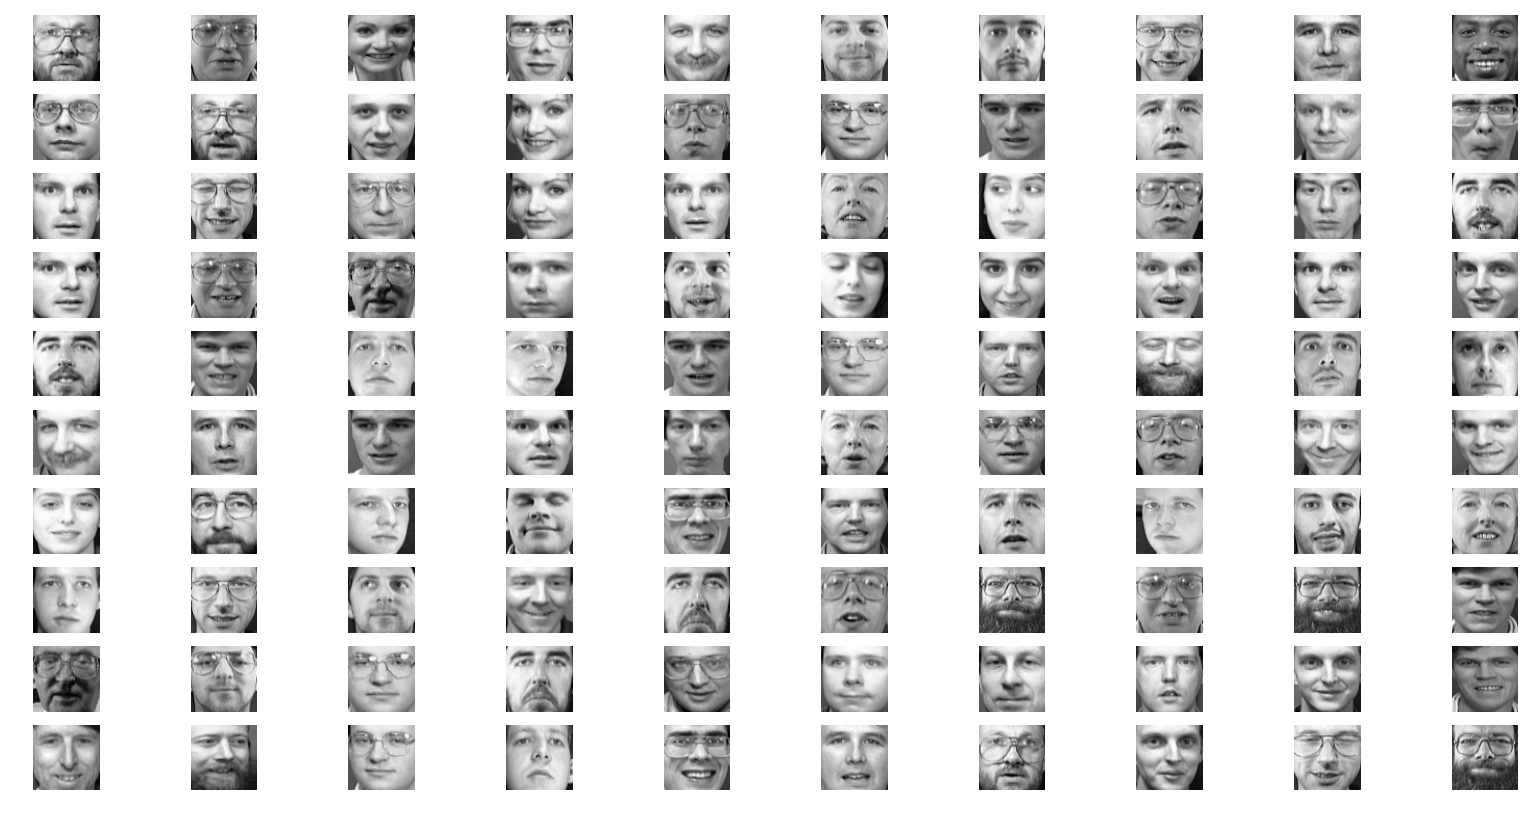

In [21]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis("off")
    plt.imshow(X[i].reshape(64,64), cmap = plt.get_cmap('gray'))
plt.show()

PCAにかけます。

**【課題１１】** Scikit-learnのAPIを用いてこの400枚の顔画像データ`X`を成分の数が100個になるようにPCAを実行するプログラムを書きましょう。固有顔はUreduceに縦方向に格納しましょう。

In [22]:
#Coursemale-02 Step7 QuestionNumber11 96d581ac33d147dc8d33a42d3c29bcb9
###############ここを穴埋めしてください###############
K = 100 #K次元まで落とす。つまり、固有値が大きい方からK個の固有顔と、それへの射影を求める。
#適切な 関数・変数・値 などにNoneを書き換えてください。
estimator = skd.PCA(n_components=K)
estimator.fit(X)
Ureduce = estimator.components_.T
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [23]:
%%bash
./validation_client.py male-02 7 11 Step7_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



求めた100個の固有顔を見てみましょう。

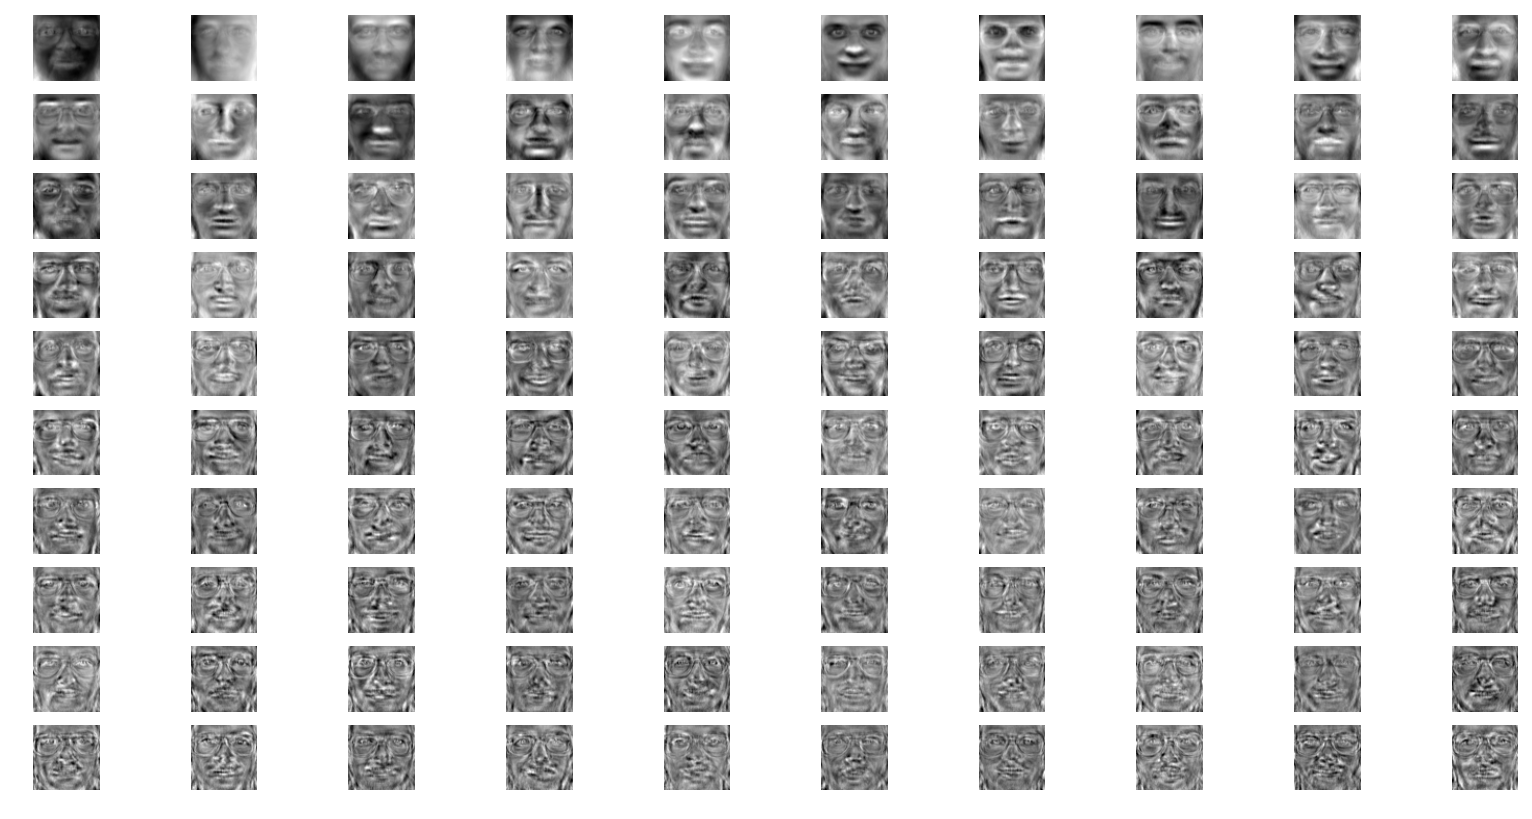

In [24]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis("off")
    plt.imshow(Ureduce[:,i].reshape(64,64), cmap = plt.get_cmap('gray'))
plt.show()

徐々に、些細な違いを指摘する固有顔になっていくことに気付くと思います。

この100個の固有顔を用いて、元の顔データを100次元へ削減します。

In [25]:
Z = estimator.transform(X)

確かに次元が落ちていることを確認しましょう。

In [26]:
print("   元の画像データの特徴の数：",X.shape[1])
print("PCAをかけたデータの特徴の数：",Z.shape[1])

   元の画像データの特徴の数： 4096
PCAをかけたデータの特徴の数： 100


これを、元に復元します。

In [27]:
X_rec = estimator.inverse_transform(Z)

復元したデータの冒頭100個をプロットしましょう。

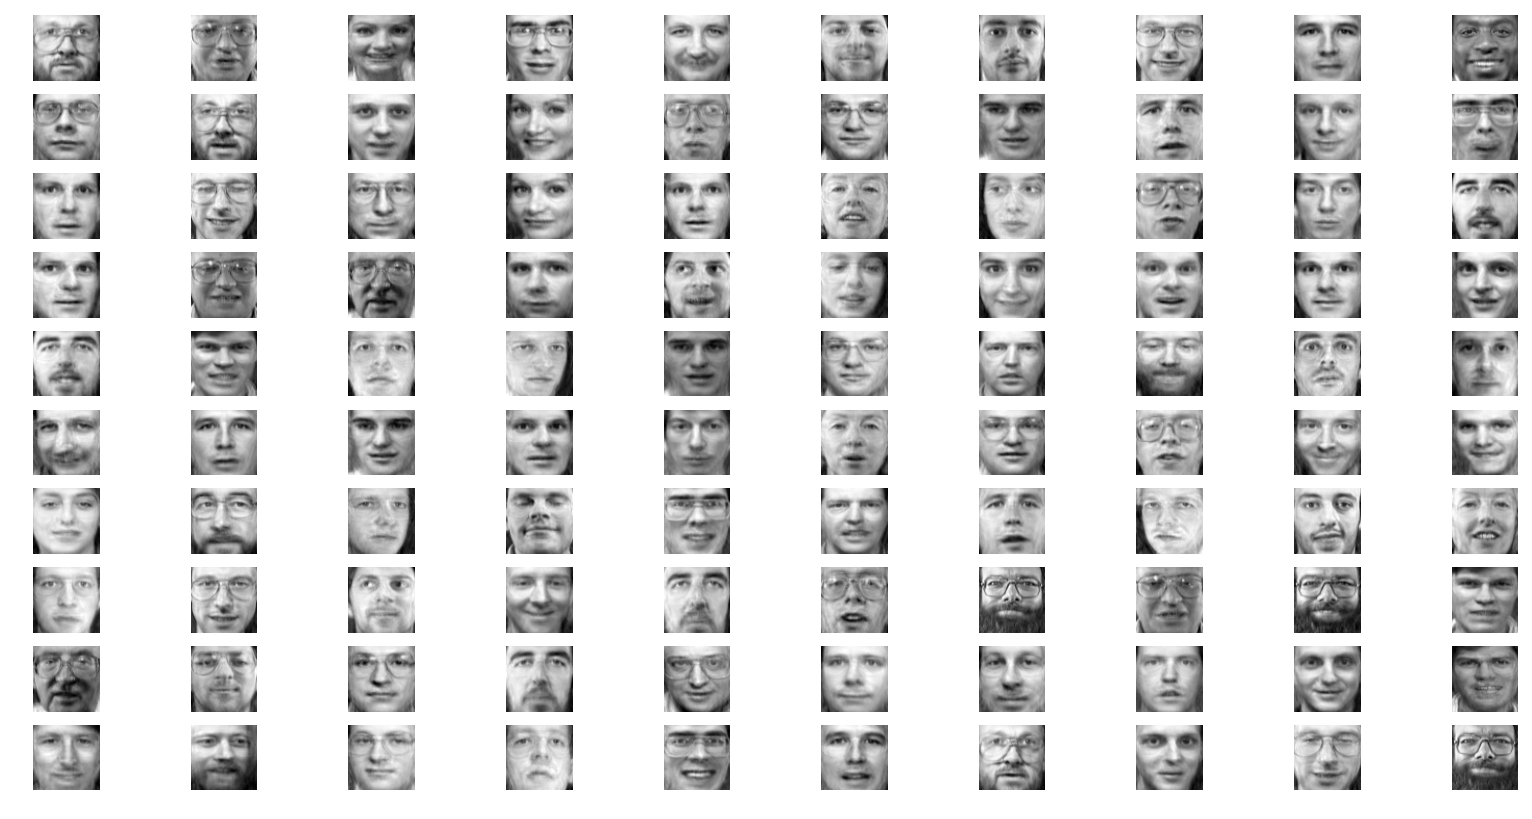

In [28]:
plt.figure(figsize=(20,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis("off")
    plt.imshow(X_rec[i].reshape(64,64), cmap = plt.get_cmap('gray'))
plt.show()

かなりいい感じに復元できています。

では、成分の数K=100で、実際どのくらいの分散を維持できているのでしょうか。

**【課題１２】** 顔画像データ`X`に対して、K=100のPCAをかけることで、どのくらいの分散を維持できているのか計算するプログラムを書きましょう。

In [29]:
#Coursemale-02 Step7 QuestionNumber12 b80d5e0725689eae359292d515162112
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
variance = estimator.explained_variance_ratio_.sum()*100
print(variance,"%の分散を維持している。")
######################################################

93.50099563598633 %の分散を維持している。


左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [30]:
%%bash
./validation_client.py male-02 7 12 Step7_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



**【課題１３】** 成分の数Kと分散の関係をグラフにプロットしましょう。

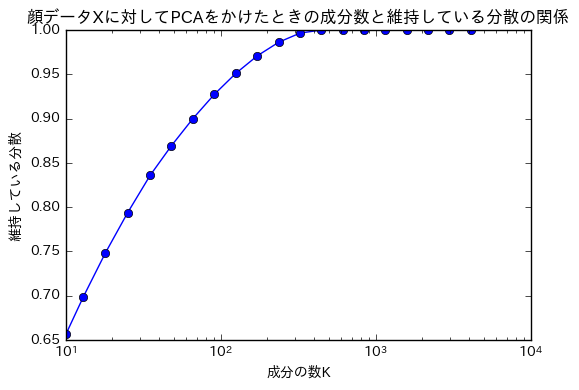

In [31]:
#Coursemale-02 Step7 QuestionNumber13 0ac95f6ddab1aade3057fe4fe431b920
K_num =20
K_list = np.logspace(1, np.log10(X.shape[1]), K_num, dtype=int)
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
tot_var = np.empty(K_num)
for i in range(K_num):
    estimator = skd.PCA(n_components= K_list[i])
    estimator.fit(X)
    tot_var[i] = estimator.explained_variance_ratio_.sum()
######################################################
plt.xscale("log")
plt.xlabel("成分の数K")
plt.ylabel("維持している分散")
plt.title("顔データXに対してPCAをかけたときの成分数と維持している分散の関係")
plt.plot(K_list, tot_var, marker="o")

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [32]:
%%bash
./validation_client.py male-02 7 13 Step7_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



成分数（特徴の数、次元）が300程度でも、ほぼ元通りに復元できることが分かりました。

**考えてみよう**

主成分分析の累積寄与率は採用した軸の特異値の和を全ての特異値の和で割ったものに等しい。その性質を利用して課題１３を解いてみよう。PCAを１回走らせるだけでよいので、高速であるはずです。

---

### 3次元のデータをPCAで次元削減して視覚化
3次元のデータをPCAを使って2次元に落としてプロットすることで、画像にk平均法を適用したとき、どのような処理を行っているのか視覚的に分かるようにしましょう。

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)

import scipy.misc as scm
import sklearn.cluster as skc
from mpl_toolkits.mplot3d.axes3d import Axes3D #3Dプロットに使う

k平均法を適用したい画像をロードし、タテヨコはflattenしておきます。

In [34]:
A = scm.imread("./dataStep7/Asagao.jpg").astype(np.float32)/255
img_size = A.shape
Aflatten = A.reshape(img_size[0] * img_size[1], 3)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':


k平均法をかけます。クラスタ数は10個としましょう。

In [35]:
estimator_pic = skc.KMeans(n_clusters=10, n_jobs=-1)
estimator_pic.fit(Aflatten)
color_idx = estimator_pic.predict(Aflatten)

全ピクセルプロットするのは流石に量が多すぎるので、ランダムに1000ピクセル選びます。

In [36]:
sel = np.random.randint(0, X.shape[0], 1000)

選んだ1000ピクセルに対して、クラスタ毎に色分けし、RGBをそれぞれ軸として3dプロットします。

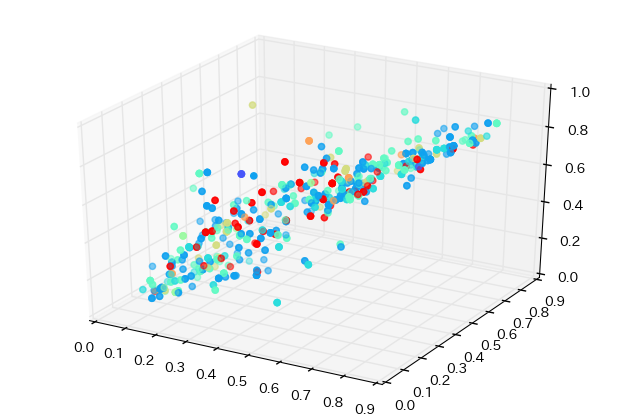

In [37]:
fig=plt.figure()
ax=Axes3D(fig)
Xs = np.array([X[s] for s in sel])
xs = Xs[:, 0]
ys = Xs[:, 1]
zs = Xs[:, 2]
idx_sel = np.array([color_idx[s] for s in sel])
cmap = plt.get_cmap("rainbow")
idx0to1 = idx_sel.astype("float")/max(idx_sel.astype("float"))
colors = cmap(idx0to1)
ax.scatter3D(xs, ys, zs=zs, c=colors, marker="o", edgecolors=colors)
plt.show()

この図だけではデータの構造が全然見いだせません。色を見てもどのようにクラスタリングしたのかさっぱり分かりません。そこで、PCAによって2次元に落とします。

**【課題１４】** 元の画像データAflattenにPCAをかけ、RGBの3次元から2次元のデータZに落としましょう。

In [38]:
#Coursemale-02 Step7 QuestionNumber14 9bb2b5c11b5a4a03830bbc5f3836c488
###############ここを穴埋めしてください###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
estimator = skd.PCA(n_components=2)
estimator.fit(Aflatten)
Z = estimator.transform(Aflatten)
######################################################

左上の**保存マークをクリックした後**、次のセルをShift+Enterで実行して採点します。

In [39]:
%%bash
./validation_client.py male-02 7 14 Step7_02.ipynb api.internal.zero2one.jp

Congratulations!
We give you 10 points out of 10 points.



これを3Dプロットの時と同じ色分けで2Dプロットします。

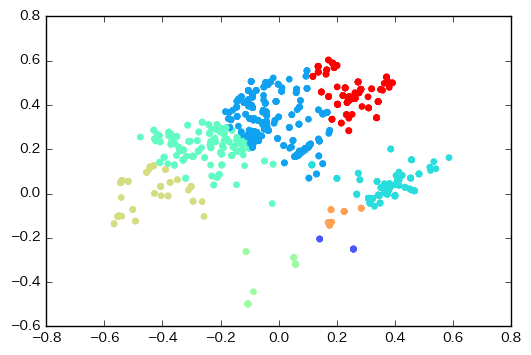

In [40]:
zs = np.array([Z[s] for s in sel])
plt.scatter(zs[:, 0], zs[:, 1], 15, marker="o", c=colors, edgecolors=colors)

これで、k平均法が画像に対してどのようなクラスタリングを行ったのか、とても分かりやすくなりました。

---
## おわりに
今回は最も有名な教師なし学習アルゴリズムであるk平均法とPCAを完全に自前で実装してもらいました。これでこれらのアルゴリズムは熟知されたと思います。自信を持ってください。

あとは、実践あるのみです。どんなものでも適材適所で扱わねばなりませんが、このコースで取り上げたアルゴリズムは全て最前線で使えるものです。どんどん現実の場面で役立てていきましょう。